<a href="https://colab.research.google.com/github/Shravanya178/MLDL_EXPS/blob/main/MLDL_EXP0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Exercise 1
import numpy as np
import pandas as pd

df = pd.read_csv("/content/student_performance.csv")
final_score = df["Final_Score"].values
print(final_score)

mean_score = np.mean(final_score)
median_score = np.median(final_score)
standard_score = np.std(final_score)
min_score = np.min(final_score)
max_score =  np.max(final_score)
normalised_score = (final_score - min_score) / (max_score - min_score)


[52 57 60 64 68 71 74 77 79 83 63 70 75 56 69 73 80 58 72 78]


In [ ]:
#Exercise 2
import pandas as pd

df = pd.read_csv("/content/student_performance.csv")
print("Shape: ", df.shape)
print("Columns: ", df.columns)
print("Missing values: ", df.isnull().sum())


def label(score):
  if score >= 75:
    return "High"
  elif score >= 50:
    return "Medium"
  else:
    return "Low"
df["performance"] = df["Final_Score"].apply(label)
print(df)

Shape:  (20, 5)
Columns:  Index(['Hours_Studied', 'Attendance', 'Assignment_Score', 'Midterm_Score',
       'Final_Score'],
      dtype='object')
Missing values:  Hours_Studied       0
Attendance          0
Assignment_Score    0
Midterm_Score       0
Final_Score         0
dtype: int64
    Hours_Studied  Attendance  Assignment_Score  Midterm_Score  Final_Score  \
0               1          60                55             50           52   
1               2          65                58             55           57   
2               3          70                60             58           60   
3               4          75                65             62           64   
4               5          80                68             65           68   
5               6          85                72             68           71   
6               7          90                75             70           74   
7               8          95                78             72           77   
8  

<function matplotlib.pyplot.show(close=None, block=None)>

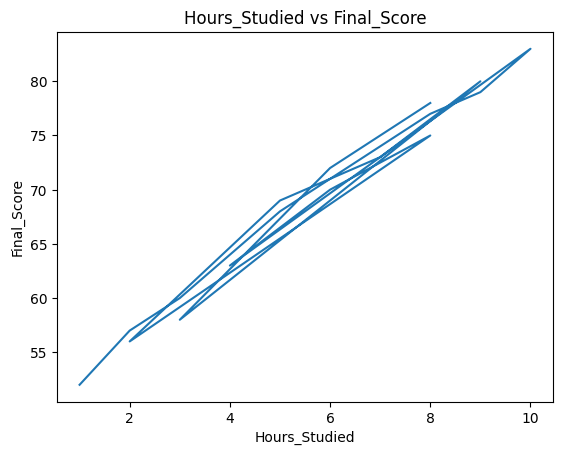

In [ ]:
#Exercise 3
import matplotlib.pyplot as plt
plt.figure
plt.plot(df["Hours_Studied"], df["Final_Score"])
plt.xlabel("Hours_Studied")
plt.ylabel("Final_Score")
plt.title("Hours_Studied vs Final_Score")
plt.show





<function matplotlib.pyplot.show(close=None, block=None)>

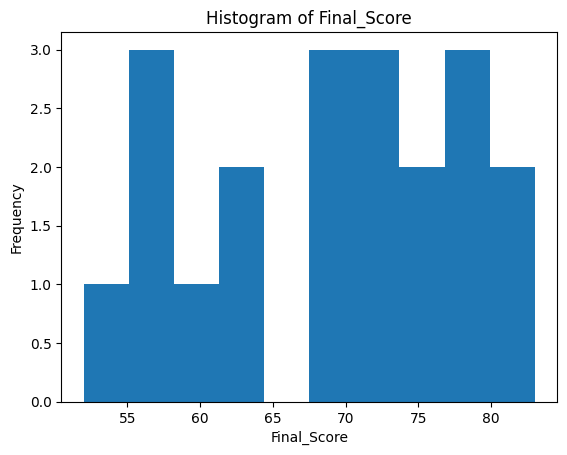

In [ ]:
plt.figure
plt.hist(df["Final_Score"], bins=10)
plt.xlabel("Final_Score")
plt.ylabel("Frequency")
plt.title("Histogram of Final_Score")
plt.show

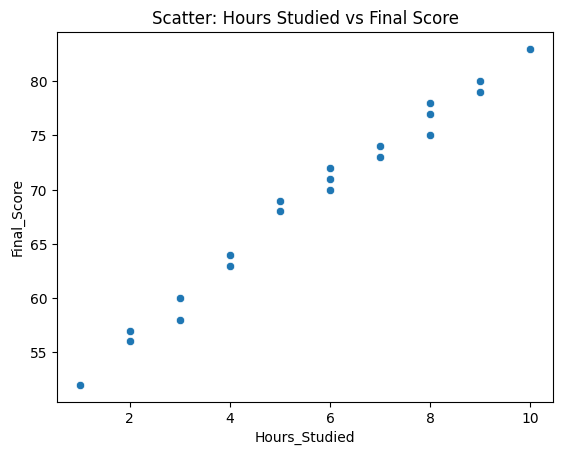

In [ ]:
#Exercise 4
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(x="Hours_Studied", y="Final_Score", data=df)
plt.title("Scatter: Hours Studied vs Final Score")
plt.show()

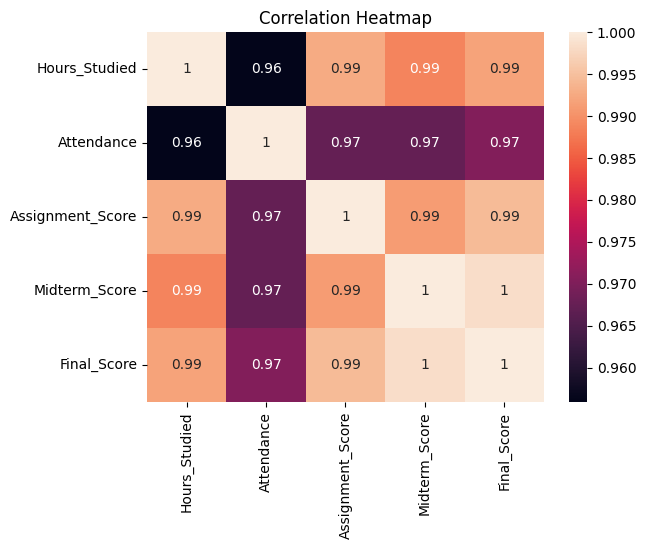

In [ ]:
plt.figure()
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

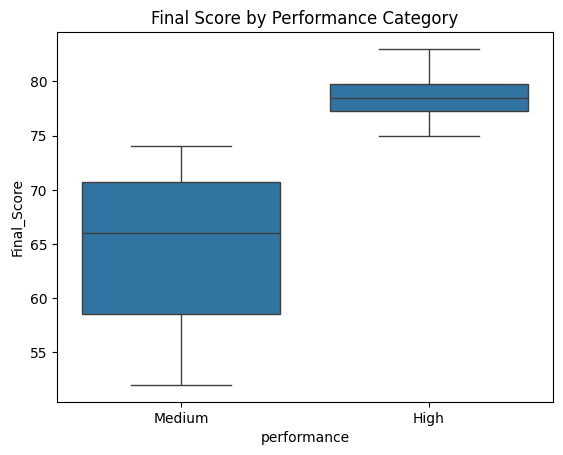

In [ ]:
plt.figure()
sns.boxplot(x="performance", y="Final_Score", data=df)
plt.title("Final Score by Performance Category")
plt.show()

In [ ]:
bins = [0, 4, 7, 10]  # Define bin edges for Hours_Studied
labels = ['Low', 'Medium', 'High']  # Define corresponding labels
df['Hours_Category'] = pd.cut(df['Hours_Studied'], bins=bins, labels=labels, right=True, include_lowest=True)
print(df[['Hours_Studied', 'Hours_Category']].head())

   Hours_Studied Hours_Category
0              1            Low
1              2            Low
2              3            Low
3              4            Low
4              5         Medium


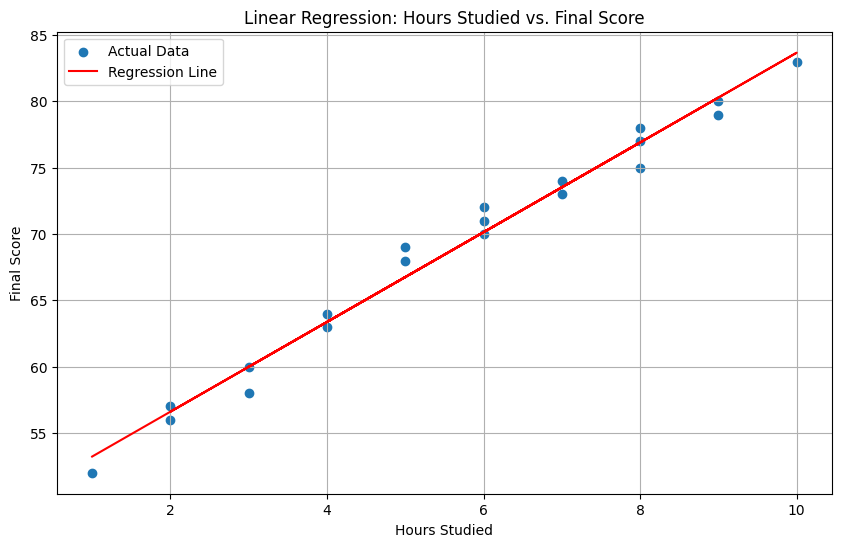

Intercept: 49.84
Coefficient for Hours_Studied: 3.38


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define feature (X) and target (y) variables
X = df[['Hours_Studied']]
y = df['Final_Score']

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for the regression line
y_pred = model.predict(X)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')

# Overlay the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Final Score')
plt.title('Linear Regression: Hours Studied vs. Final Score')
plt.legend()
plt.grid(True)
plt.show()

# Print intercept and coefficient
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Hours_Studied: {model.coef_[0]:.2f}")

In [ ]:
target_score = 90

# Get the intercept and coefficient from the trained model
intercept = model.intercept_
coefficient = model.coef_[0]

# Rearrange the linear regression equation: Final_Score = Intercept + Coefficient * Hours_Studied
# To find Hours_Studied = (Final_Score - Intercept) / Coefficient
predicted_hours = (target_score - intercept) / coefficient

print(f"To achieve a Final_Score of {target_score}, a student would need to study approximately {predicted_hours:.2f} hours.")


target_scores_to_test = [60, 75, 85]
print("\n--- Predicting hours for other target scores ---")
for score in target_scores_to_test:
    predicted_hours_for_score = (score - intercept) / coefficient
    print(f"For a Final_Score of {score}, predicted hours needed: {predicted_hours_for_score:.2f} hours.")

To achieve a Final_Score of 90, a student would need to study approximately 11.87 hours.

--- Predicting hours for other target scores ---
For a Final_Score of 60, predicted hours needed: 3.00 hours.
For a Final_Score of 75, predicted hours needed: 7.44 hours.
For a Final_Score of 85, predicted hours needed: 10.39 hours.
